# Libraries

In [37]:
# Libraries
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display
from selenium import webdriver
# We will use Chrome for scraping
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
import re


# Usage of BeautifulSoup, requests, regex, lambda to scrape  
https://lodzka.policja.gov.pl/ld/form/63,Statystyki-dnia.html?

In [38]:
# Initialization of start page index
page_index = 0
# List to store scraped values
values = list()
# Final site to scrape
final_index = 149


# First approach

In [39]:
try:
    while (re.search('page=\d+$',url)) and page_index <= final_index:
        # Url of the website to scrape
        url = f"https://lodzka.policja.gov.pl/ld/form/63,Statystyki-dnia.html?page={page_index}"

        # Send respond to the server with specified url
        response = requests.get(url=url)

        # Assert whether the status of response is 200 which means: Successful response
        assert response.status_code == 200

        # Parse the html content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the headers of the tables (they are stored in: table tag -> attribute class with value table-listing margin_b20 -> tag th)
        headers = [header.text for header in soup.findAll("table", {"class":"table-listing margin_b20"})[0].find_all({"th"})]

        # Extend the values list about scraped values that are in format of comprehensive list
        values.extend([value.text for value in soup.findAll("table", {"class":"table-listing margin_b20"})[0].find_all({"td"})])
        
        # Increment the page index
        page_index += 1

        time.sleep(np.ceil(np.random.gamma(1.5, 1.5)))

        # Message to follow the scraping process
        if page_index % 20 == 0:
            print(f"Scraped {page_index} pages\n")

except AssertionError:
    'Response status code different than 200!'
except IndexError:
    'All sites has been scraped!'


Scraped 20 pages

Scraped 40 pages

Scraped 60 pages

Scraped 80 pages

Scraped 100 pages

Scraped 120 pages

Scraped 140 pages



# Second approach

In [ ]:
# # Error handling try-except block to prevent from index error
# try:
#     # Loop statement: we loop through all url's that contain word "Statystyki"
#     while "Statystyki" in url:

#         # Send respond to the server with specified url
#         response = requests.get(url = url)

#         # Assert whether the status of response is 200 which means: Successful response
#         assert response.status_code == 200

#         # Parse the html content
#         soup = BeautifulSoup(response.text, "html.parser")
        
#         # Extract the headers of the tables (they are stored in: table tag -> attribute class with value table-listing margin_b20 -> tag th)
#         headers = [header.text for header in soup.findAll("table", {"class":"table-listing margin_b20"})[0].find_all({"th"})]

#         # Extend the values list about scraped values that are in format of comprehensive list
#         values.extend([value.text for value in soup.findAll("table", {"class":"table-listing margin_b20"})[0].find_all({"td"})])

#         # Find all hypertext references (they were stored in: div tag -> attribute id with value meni_strony -> tag a)
#         pages_linked = [page.get("href") for page in soup.findAll("div", {"id":"meni_strony"})[0].findAll("a")]
        
#         # As there are many hyperlinks for every page, we choose the page that has index about one higher that one we are on
#         pages_next = list(filter(lambda x: x if "page="+str(i+1) in x else 0, pages_linked))[0]
        
#         # Assign new url to url variable
#         url = url.split("/ld/")[0]+pages_next
        
#         # Increment the page index
#         i += 1
        
#         # We use time sleep with gamma distribution (right-skewed distribution) to prevent being recognized as a bot
#         time.sleep(np.ceil(np.random.gamma(2., 2.)))

# # When the IndexError occurs, we looped through all websites
# except IndexError:
#     print("All sites has been scraped")

In [40]:
# List of lists that will be then converted to rows in pandas dataframe
observations = list()

# Append list of observations for every day to observations list
for i in range(int(len(values) / 7)):
    observations.append(values[7*i:7*(i+1)])

In [41]:
# Create pandas dataframe
data = pd.DataFrame(observations)

# Change headers to scraped ones
data.columns = headers

# Convert column "Data" to datetime
data["Data"] = data["Data"].astype("datetime64[ns]")

# Create a function that converts all object columns to numeric data type
def object_to_integer(dataframe):
    """Converts object columns to integer data type"""
    for column in dataframe.columns:
        if dataframe[column].dtype == "object":
            dataframe[column] = dataframe[column].astype("int")

# Use function "object_to_integer" on our collected data
object_to_integer(data)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Data                             2980 non-null   datetime64[ns]
 1   Zatrzymani na gorącym uczynku    2980 non-null   int32         
 2   Zatrzymani poszukiwani           2980 non-null   int32         
 3   Zatrzymani nietrzeźwi kierujący  2980 non-null   int32         
 4   Wypadki drogowe                  2980 non-null   int32         
 5   Zabici w wypadkach               2980 non-null   int32         
 6   Ranni w wypadkach                2980 non-null   int32         
dtypes: datetime64[ns](1), int32(6)
memory usage: 93.3 KB


# Exploratory Data Analysis
Plot the histogram for some of the variables

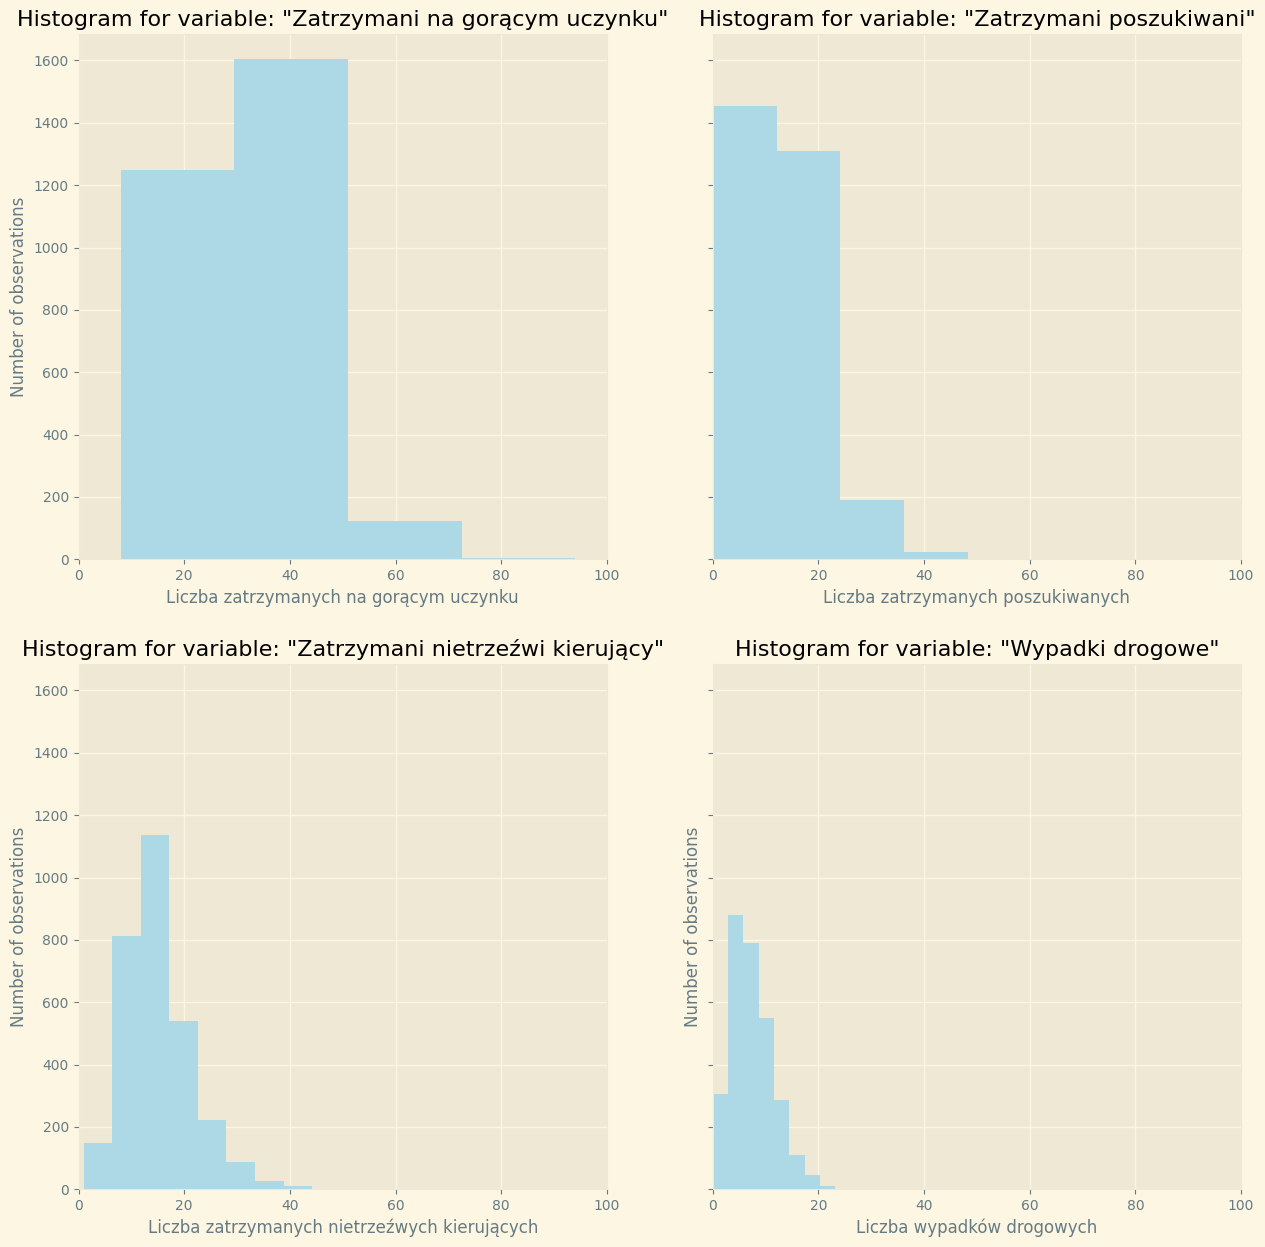

In [42]:
plt.style.use('Solarize_Light2') 
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(nrows=2, ncols=2, sharey = True)
# First plot
ax[0,0].hist(data = data, x = "Zatrzymani na gorącym uczynku", color="lightblue")
ax[0,0].set_xlabel("Liczba zatrzymanych na gorącym uczynku")
ax[0,0].set_ylabel("Number of observations")
ax[0,0].set_title('Histogram for variable: "Zatrzymani na gorącym uczynku"')
ax[0,0].set_xlim(0,100)
# Second plot
ax[0,1].hist(data = data, x = "Zatrzymani poszukiwani", color="lightblue")
ax[0,1].set_xlabel("Liczba zatrzymanych poszukiwanych")
ax[0,1].set_title('Histogram for variable: "Zatrzymani poszukiwani"')
ax[0,1].set_xlim(0,100)
# Third plot
ax[1,0].hist(data = data, x = "Zatrzymani nietrzeźwi kierujący", color="lightblue")
ax[1,0].set_xlabel("Liczba zatrzymanych nietrzeźwych kierujących")
ax[1,0].set_ylabel("Number of observations")
ax[1,0].set_title('Histogram for variable: "Zatrzymani nietrzeźwi kierujący"')
ax[1,0].set_xlim(0,100)
# Fourth plot
ax[1,1].hist(data = data, x = "Wypadki drogowe", color="lightblue")
ax[1,1].set_xlabel("Liczba wypadków drogowych")
ax[1,1].set_ylabel("Number of observations")
ax[1,1].set_title('Histogram for variable: "Wypadki drogowe"')
ax[1,1].set_xlim(0,100)
plt.show()

# What is the 5 highest number of people in every group?

In [43]:
for column in list(data.columns)[1:]:
    display(data.loc[:,["Data", column]].sort_values(column, ascending=False).head(5))

,Data,Zatrzymani na gorącym uczynku
815,2022-01-19,223
2861,2016-06-12,88
2470,2017-07-09,78
2878,2016-05-25,77
903,2021-10-23,71


,Data,Zatrzymani poszukiwani
1395,2020-06-18,121
2759,2016-09-22,51
157,2023-11-08,48
1864,2019-03-07,46
1862,2019-03-08,46


,Data,Zatrzymani nietrzeźwi kierujący
2861,2016-06-12,55
2135,2018-06-09,44
1693,2019-08-25,42
1385,2020-06-29,40
1308,2020-09-13,40


,Data,Wypadki drogowe
2292,2018-01-03,29
2692,2016-11-28,24
2853,2016-06-20,23
2861,2016-06-12,23
2136,2018-06-08,22


,Data,Zabici w wypadkach
269,2023-07-20,18
2972,2016-02-17,10
239,2023-08-19,8
544,2022-10-18,8
751,2022-03-25,7


,Data,Ranni w wypadkach
2843,2016-07-30,41
2783,2016-08-29,34
2378,2017-10-09,32
2855,2016-06-19,31
2887,2016-05-16,31


# Usage of BeautifulSoup, requests to scrape   
https://policja.pl/pol/form/1,Informacja-dzienna.html?

In [45]:
i=0
tables=[]
# Specifing last page to wich we will iterate
last_page = 10
while i < last_page: 
    # Iterating through all pages until the last one    
    url=f"https://policja.pl/pol/form/1,Informacja-dzienna.html?page={i}"
    # Send respond to the server with specified url
    response = requests.get(url)
    # Get html content of the website
    html = response.text 
    # Parse the html content
    soup = BeautifulSoup(html, 'html.parser')
    # Finding all tables in on webpage
    tables.append(soup.find_all('table'))
     # Using time sleep with gamma distribution to prevent being recognized as a bot
    time.sleep(np.ceil(np.random.gamma(1.2, 1.2)))
    #De-bug print
    print(f"Scraped {i + 1} out of {last_page} pages\n")
    i=i+1

Scraped 1 out of 10 pages

Scraped 2 out of 10 pages

Scraped 3 out of 10 pages

Scraped 4 out of 10 pages

Scraped 5 out of 10 pages

Scraped 6 out of 10 pages

Scraped 7 out of 10 pages

Scraped 8 out of 10 pages

Scraped 9 out of 10 pages

Scraped 10 out of 10 pages



In [46]:
dfs = []
# Extract data from the table and create a DataFrame
for i in range(len(tables)):
    rows = []
    for row in tables[i][0].find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        # print(columns)
        rows.append([col.get_text(strip=True) for col in columns])
    # Define column names
    columns_names = ['Data statystyki', 'Interwencje', 'Zatrzymani na gorącym uczynku', 'Zatrzymani poszukiwani','Kierujący po spożyciu alkoholu','Wypadki drogowe','Zabici w wypadkach','Ranni w wypadkach']
    # Create a Pandas DataFrame
    df = pd.DataFrame(rows, columns=columns_names)
    # Append the DataFrame to the list
    print(f"Appended {i + 1} out of {last_page} tables \n")
    dfs.append(df)

Appended 1 out of 10 tables 

Appended 2 out of 10 tables 

Appended 3 out of 10 tables 

Appended 4 out of 10 tables 

Appended 5 out of 10 tables 

Appended 6 out of 10 tables 

Appended 7 out of 10 tables 

Appended 8 out of 10 tables 

Appended 9 out of 10 tables 

Appended 10 out of 10 tables 



In [47]:
#Results of scraping
dfs[1] 

,Data statystyki,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Kierujący po spożyciu alkoholu,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach
0,2024-03-29,18318,580,508,280,58,7,62
1,2024-03-28,16435,458,518,170,50,5,56
2,2024-03-27,16371,533,448,182,61,5,61
3,2024-03-26,15462,488,419,187,59,4,71
4,2024-03-25,15028,545,413,252,67,6,78
5,2024-03-24,13399,528,260,266,28,1,35
6,2024-03-23,16118,542,260,268,66,7,72
7,2024-03-22,16392,516,410,194,52,8,53
8,2024-03-21,15590,517,411,190,52,3,65
9,2024-03-20,14209,459,361,155,53,8,61


# Usage of Selenium, BeautifulSoup to scrape  
https://lodzka.policja.gov.pl/

In [48]:
chromepath = ChromeDriverManager().install()
print(chromepath)

C:\Users\User\.wdm\drivers\chromedriver\win64\123.0.6312.122\chromedriver-win32/chromedriver.exe


In [49]:
website = "https://lodzka.policja.gov.pl/"
# xpath for button "RUCH DROGOWY"
ruch_drogowy_button_xpath = "//span[contains(text(),'Ruch Drogowy')]"

service_chrome = Service(executable_path=chromepath)
options_chrome = webdriver.ChromeOptions()
driver_chrome = webdriver.Chrome(service=service_chrome, options=options_chrome)
# Maximize the browser window
driver_chrome.maximize_window()
# Open a website
driver_chrome.get(website)
# Delay the website
time.sleep(3)
content = driver_chrome.find_element("xpath", ruch_drogowy_button_xpath)
# Click the "RUCH DROGOWY" button
content.click()
# Delay the website
time.sleep(3)

last_height = driver_chrome.execute_script("return document.body.scrollHeight")
driver_chrome.execute_script("window.scrollTo(0,2200)")

# Delay the website
time.sleep(3)
# xpath for button "pokaz wiecej"
pokaz_wiecej_button_xpath = "//body/div[@id='page']/div[@id='content']/article[@id='wtxt']/div[2]/div[2]/a[1]"
content = driver_chrome.find_element("xpath", pokaz_wiecej_button_xpath)
# Click the "RUCH DROGOWY" button
content.click()

# Get the HTML content of the page
content = driver_chrome.find_element("xpath", "//*")
source_code = content.get_attribute("outerHTML")

# Headers of the 5 most actual articles

In [50]:
# Parse the html content of the webpage
html = BeautifulSoup(source_code, 'html.parser')
results = list()

for header in html.find_all('strong'):
    if "span" not in str(header):
        results.append(header.text)
        
display(pd.DataFrame({'Headers': results}))


,Headers
0,Wielkanoc 2024 - Bezpieczniej na drogach wojew...
1,Bezpieczna droga do celu – mówimy stanowcze NI...
2,„WIELKANOC 2024”
3,"Uwaga, może być ślisko na drogach!"
4,Ruszyła akcja „Łapki na kierownicę”
5,„Na Drodze – Patrz i Słuchaj”
6,Policjanci podsumowali działania „Bezpieczne F...
7,"Podsumowanie Akcji ""Truck & Bus"""
8,Policyjne działania - TRUCK & BUS
9,Zwolnij! Jak kocha to poczeka. Łamiąc przepisy...


https://policja.pl/pol/form/1,Informacja-dzienna.html

In [52]:
website = "https://policja.pl/pol/form/1,Informacja-dzienna.html?page=0"
last_page=373

service_chrome = Service(executable_path=chromepath)
options_chrome = webdriver.ChromeOptions()
driver_chrome = webdriver.Chrome(service=service_chrome, options=options_chrome)
# Maximize the browser window
driver_chrome.maximize_window()
# Open a website
driver_chrome.get(website)
# Delay the website

for i in range(10,16):
    #for firt 7 pages button xpath changes so we need to use dynamic loop
    next_page_button_xpath =f"/html/body/div[3]/div[3]/div[2]/div/div[2]/div[2]/ul/li[{i}]/a"
    time.sleep(2)
    content = driver_chrome.find_element("xpath", next_page_button_xpath)
    content.click()
page=8
while page<last_page:
    #button xpath is constant so we can iterate till end
    next_page_button_xpath ="/html/body/div[3]/div[3]/div[2]/div/div[2]/div[2]/ul/li[16]/a"
    time.sleep(2)
    content = driver_chrome.find_element("xpath", next_page_button_xpath)
    content.click()
    page+=1

ElementClickInterceptedException: Message: element click intercepted: Element <a href="/pol/form/1,Informacja-dzienna.html?page=1" onclick="return ajax_go_to('','')">...</a> is not clickable at point (1099, 889). Other element would receive the click: <div style="box-sizing:border-box; position:relative; display:block; width:100%; max-width:970px; margin:0 auto; padding:3rem 2.5rem 1rem 1rem; text-align:left; color:#000;">...</div>
  (Session info: chrome=123.0.6312.107)
Stacktrace:
	GetHandleVerifier [0x01214CA3+225091]
	(No symbol) [0x01144DF1]
	(No symbol) [0x00FE9A7A]
	(No symbol) [0x01026D42]
	(No symbol) [0x01025574]
	(No symbol) [0x010235DB]
	(No symbol) [0x010227BA]
	(No symbol) [0x010198DE]
	(No symbol) [0x0103F55C]
	(No symbol) [0x0101930E]
	(No symbol) [0x0103F7F4]
	(No symbol) [0x01055CB0]
	(No symbol) [0x0103F2F6]
	(No symbol) [0x010179B9]
	(No symbol) [0x0101879D]
	sqlite3_dbdata_init [0x01689A43+4064547]
	sqlite3_dbdata_init [0x0169104A+4094762]
	sqlite3_dbdata_init [0x0168B948+4072488]
	sqlite3_dbdata_init [0x0138C9A9+930953]
	(No symbol) [0x011507C4]
	(No symbol) [0x0114ACE8]
	(No symbol) [0x0114AE11]
	(No symbol) [0x0113CA80]
	BaseThreadInitThunk [0x76E5FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77047C5E+286]
	RtlGetAppContainerNamedObjectPath [0x77047C2E+238]
